In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Loading dataset

In [57]:
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [60]:
df3 = df.astype('category')

In [61]:
df3.dtypes

Unnamed: 0                  category
cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                category
cap_diameter                category
dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in df3.columns:
    df3[col] = labelencoder.fit_transform(df3[col])

In [65]:
df3.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


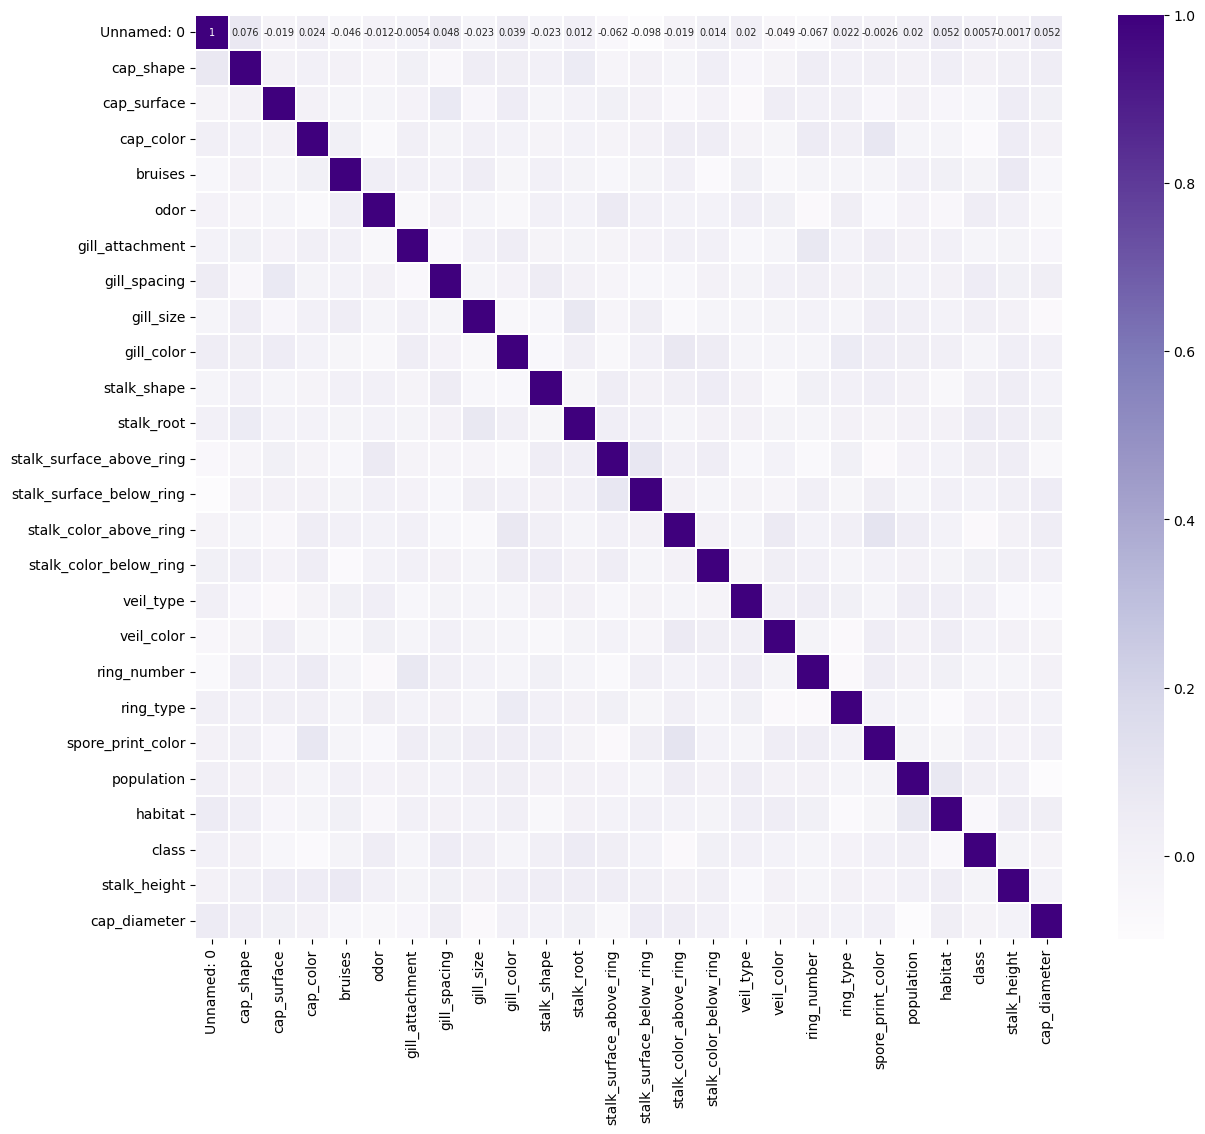

In [66]:
plt.figure(figsize=(14,12))
sns.heatmap(df3.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

In [67]:
df3[['class', 'gill_color']].groupby(['gill_color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill_color,class
6,6,0.810185
3,3,0.751553
4,4,0.743750
0,0,0.713542
9,9,0.709924
7,7,0.684524
5,5,0.683060
10,10,0.682432
2,2,0.672727
1,1,0.657895


# 2) EDA

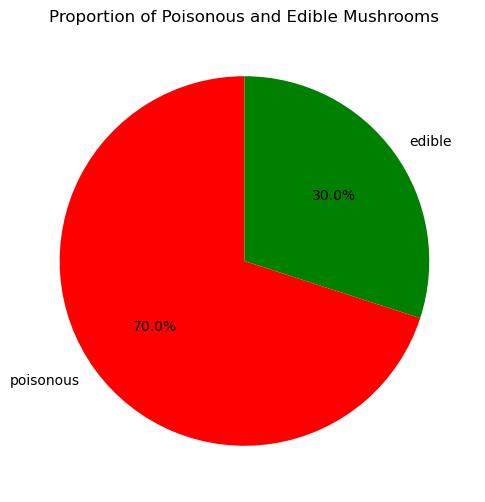

In [34]:
# poisonous vs edible mushrooms
class_counts = df['class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Proportion of Poisonous and Edible Mushrooms')
plt.show()

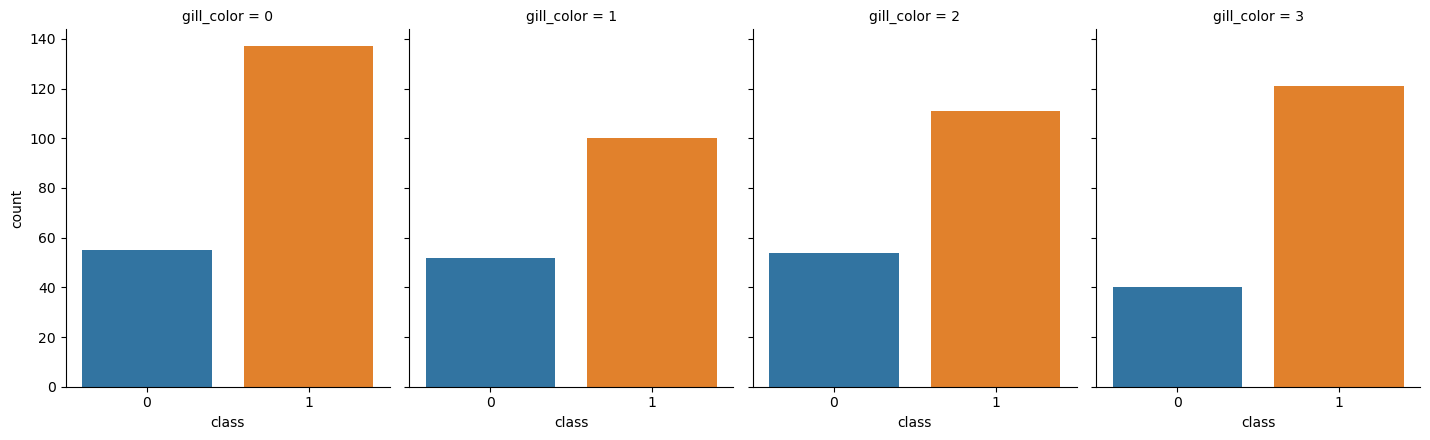

In [68]:
new_var = df3[['class', 'gill_color']]
new_var = new_var[new_var['gill_color']<=3.5]
sns.catplot(x='class', col='gill_color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

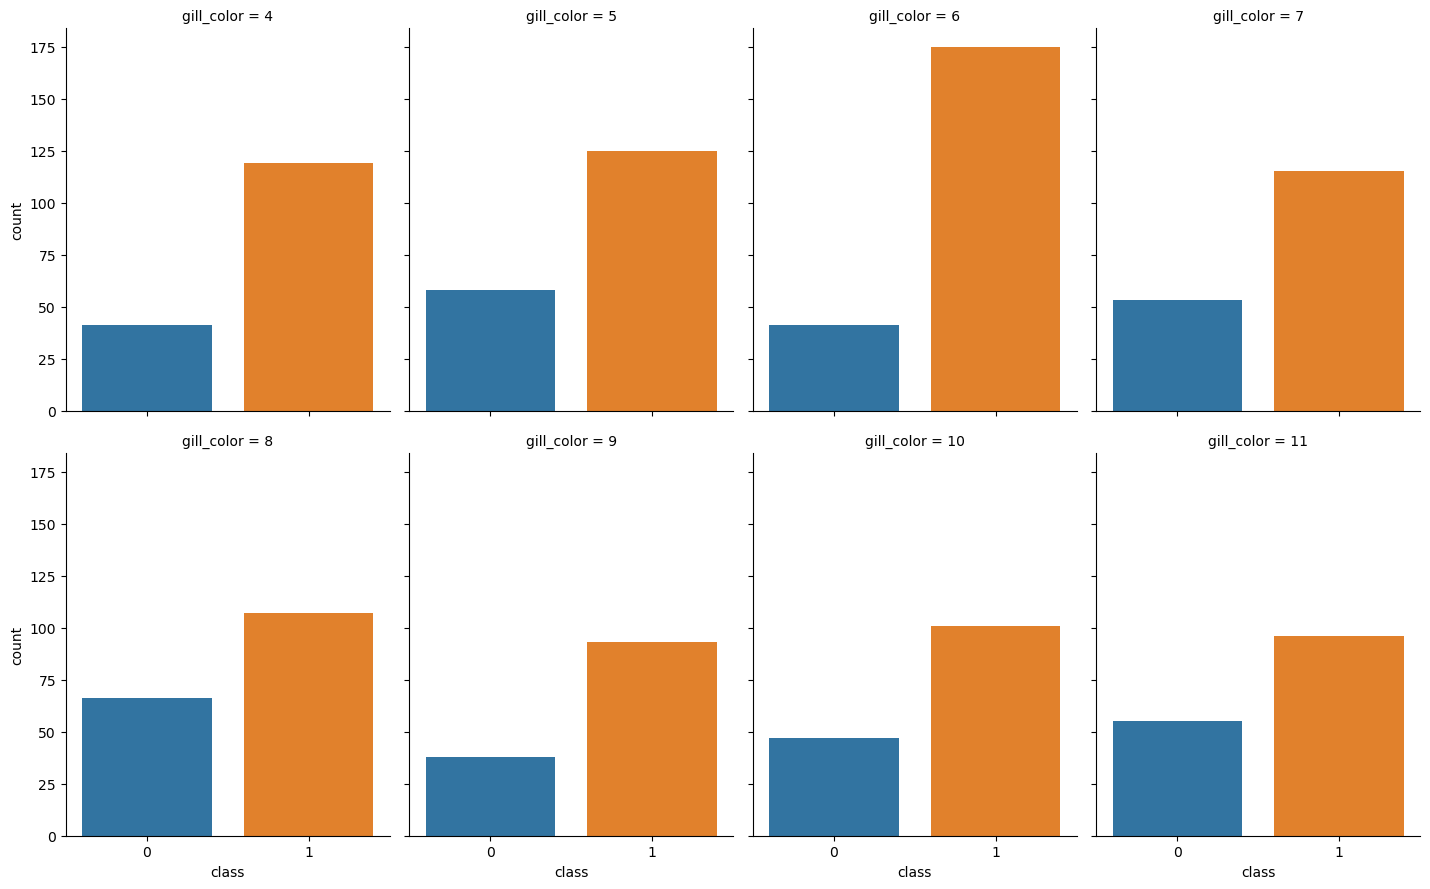

In [70]:
new_var=df3[['class', 'gill_color']]
new_var=new_var[new_var['gill_color']>3.5]

sns.catplot(x='class', col='gill_color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAUSHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

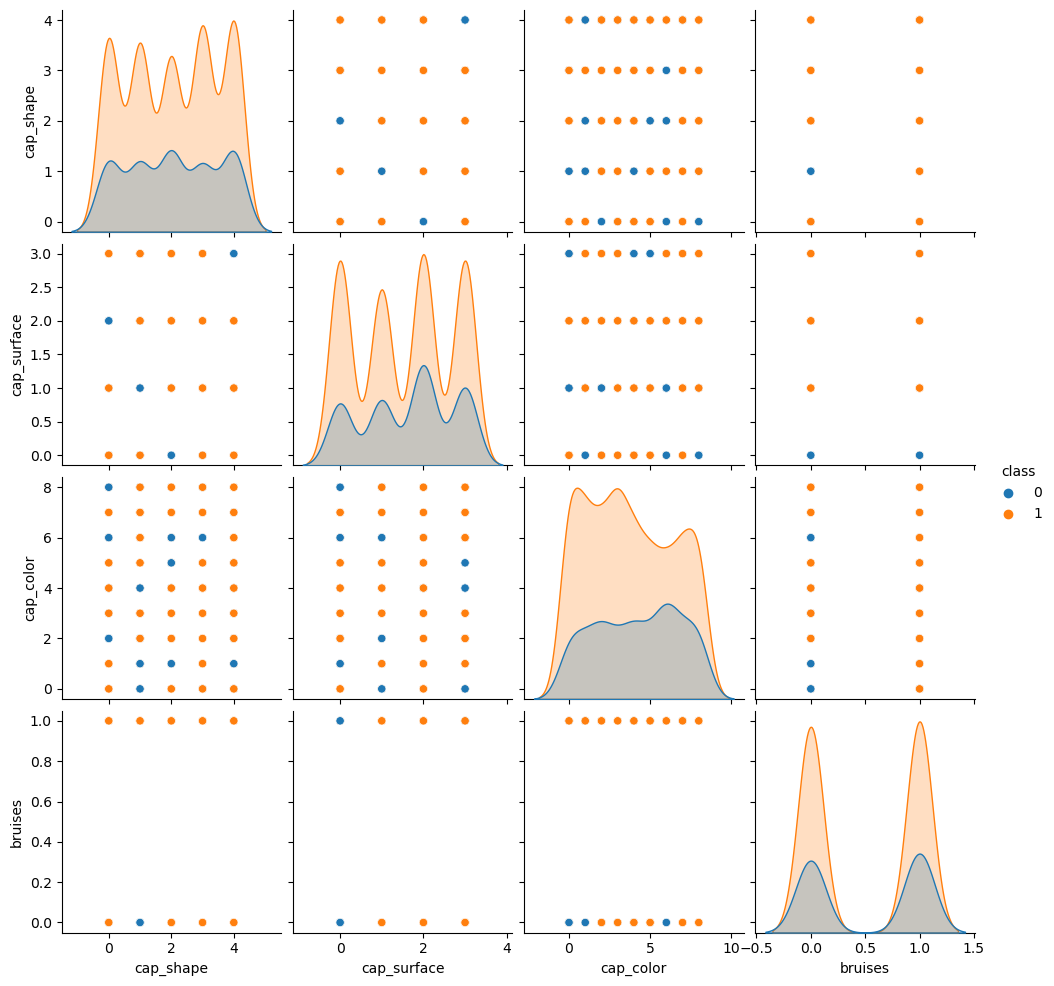

In [71]:
sns.pairplot(df3, hue='class', vars=df3.columns[1:5])
plt.show()

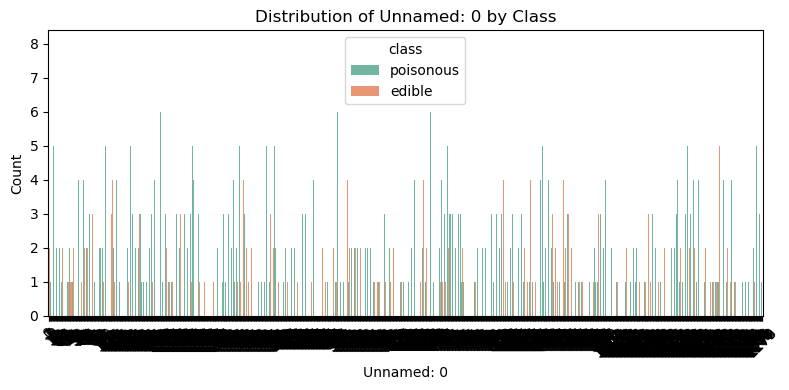

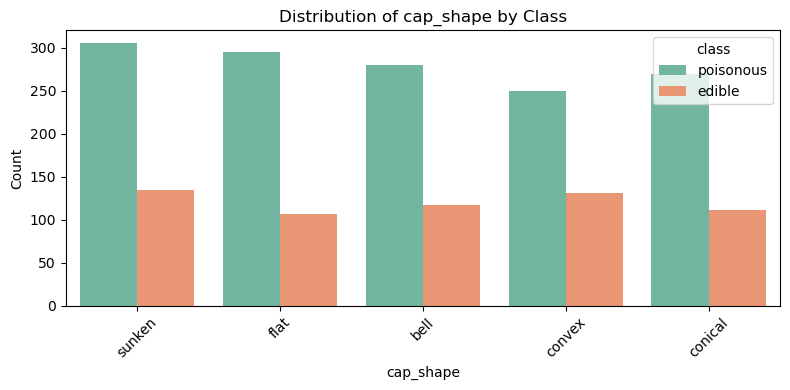

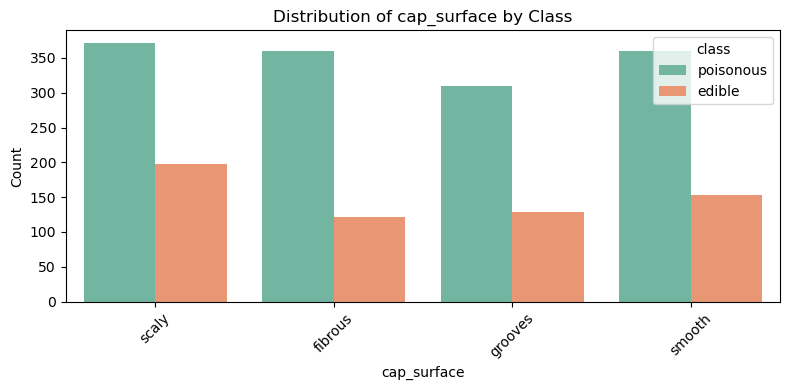

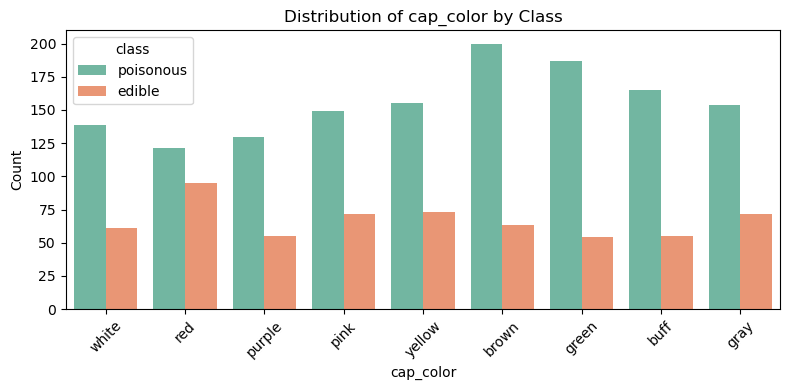

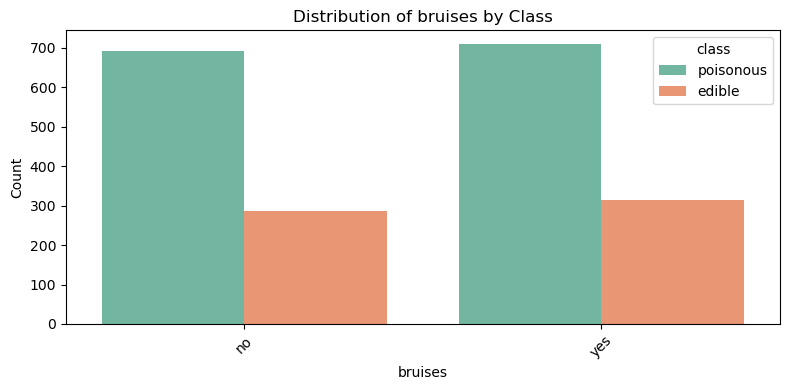

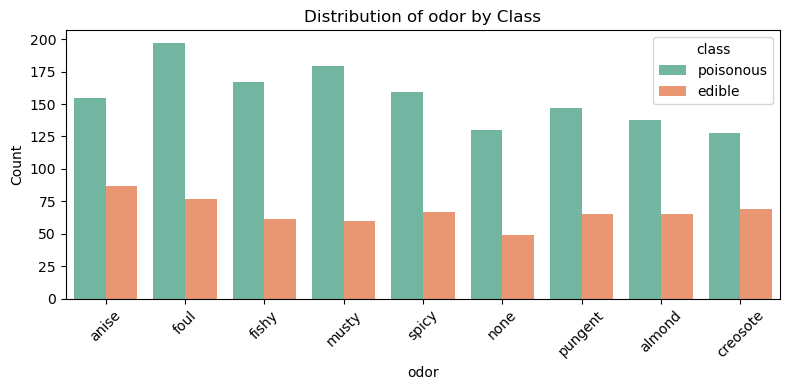

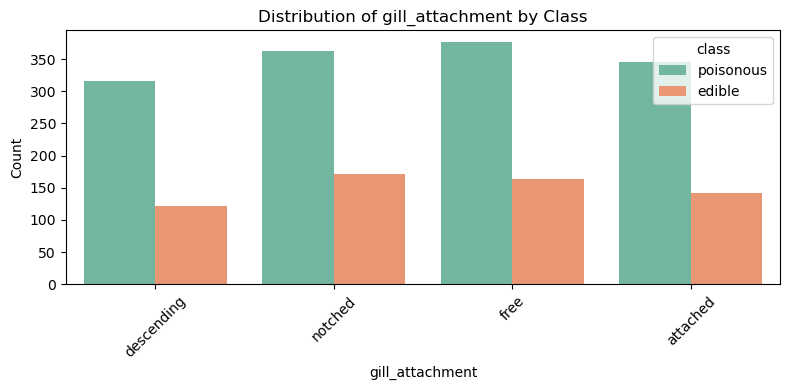

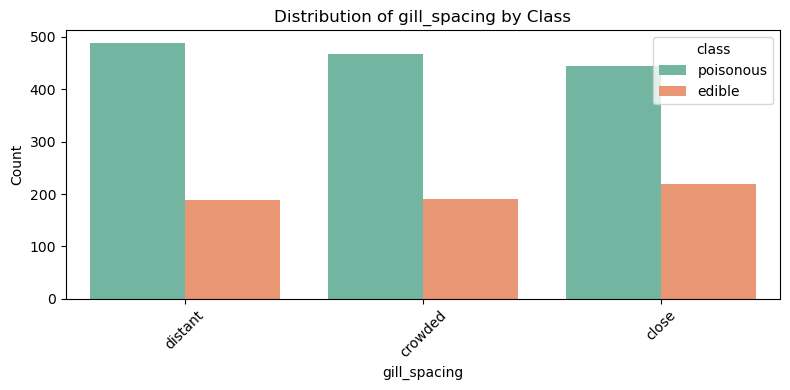

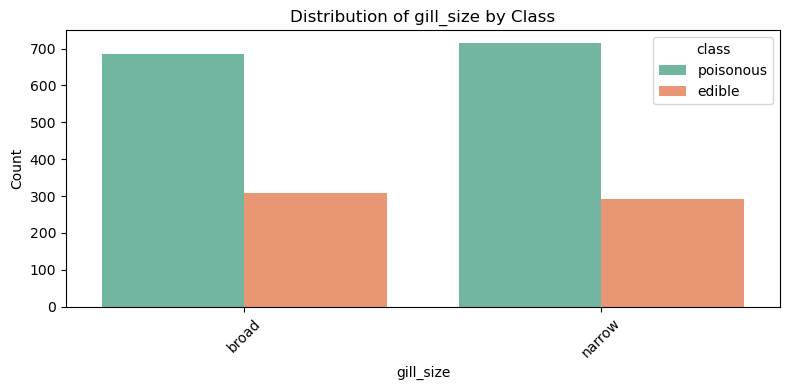

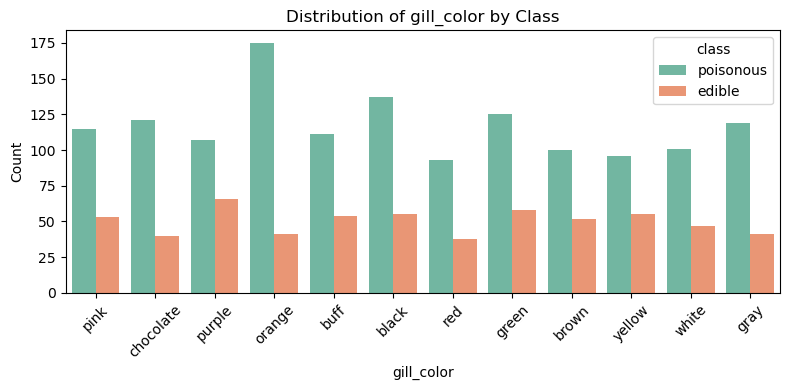

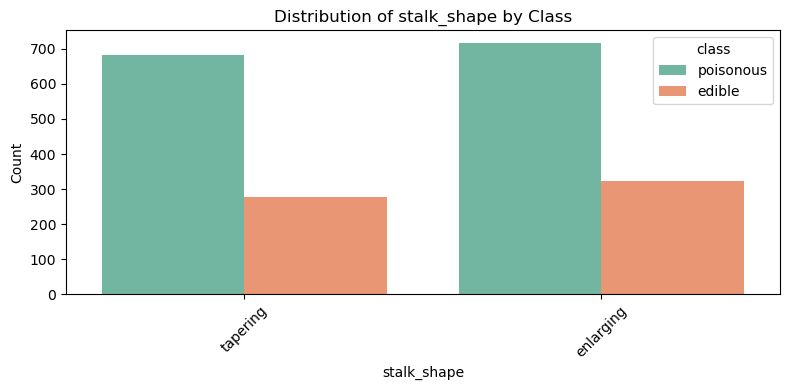

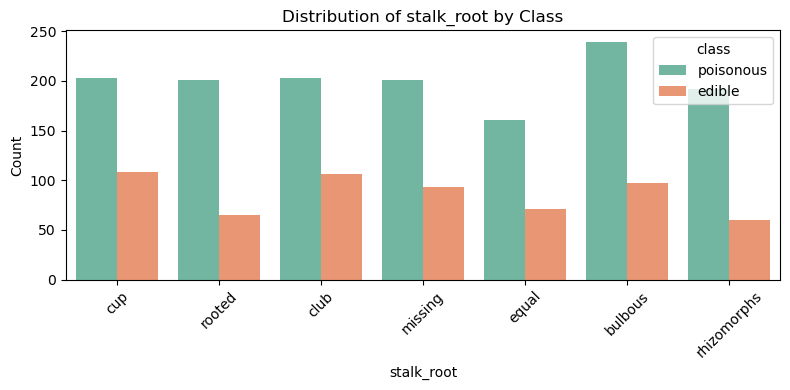

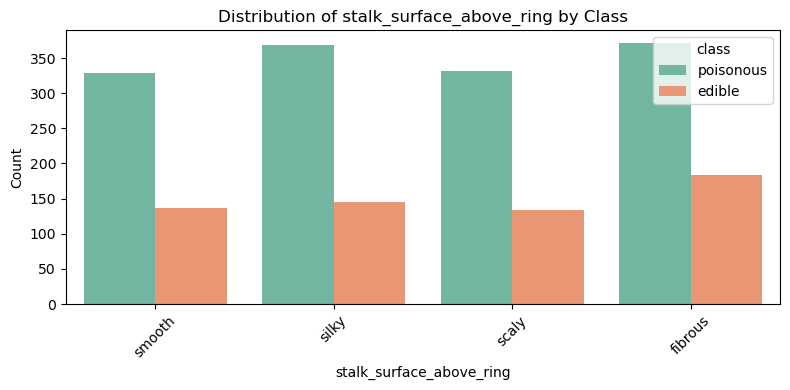

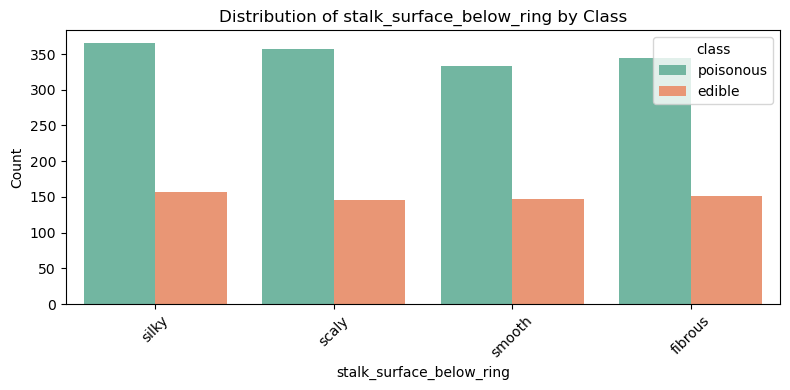

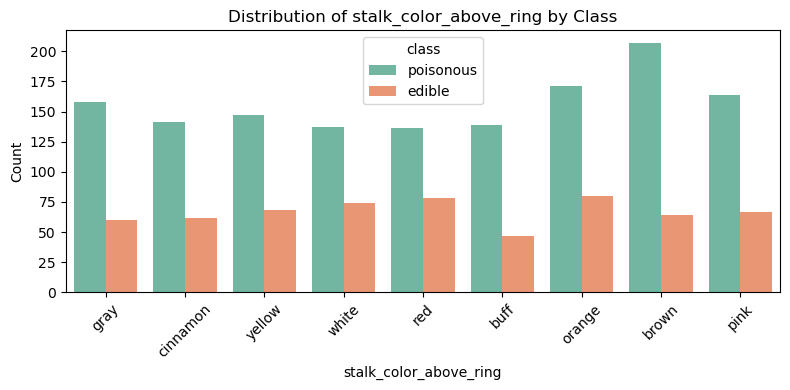

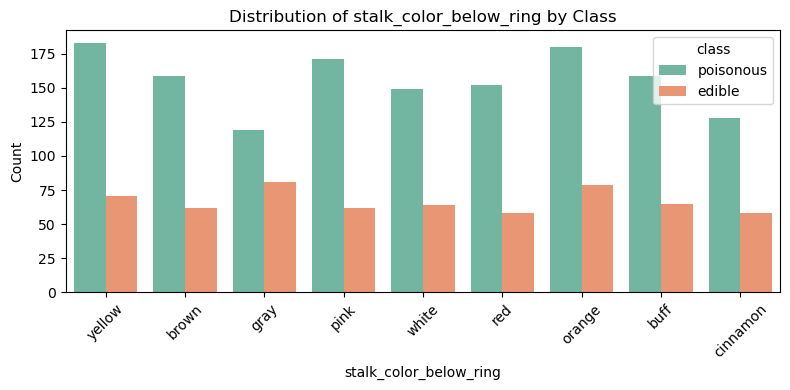

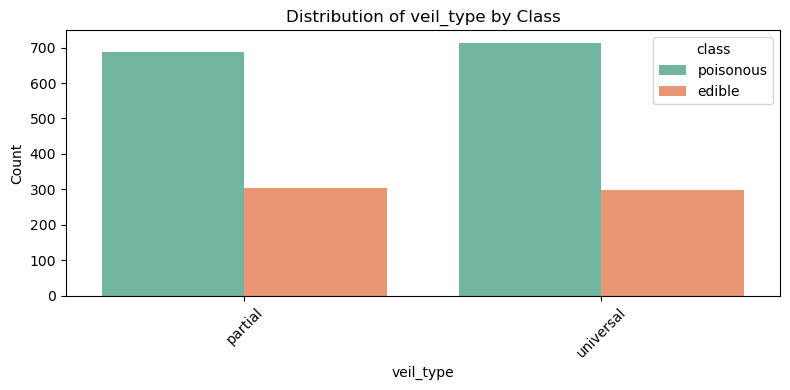

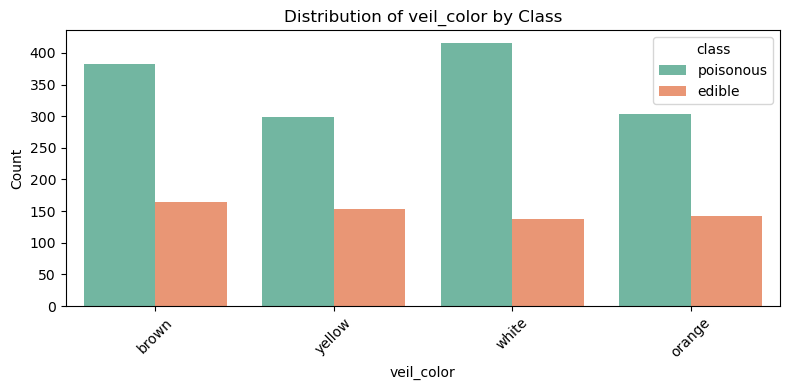

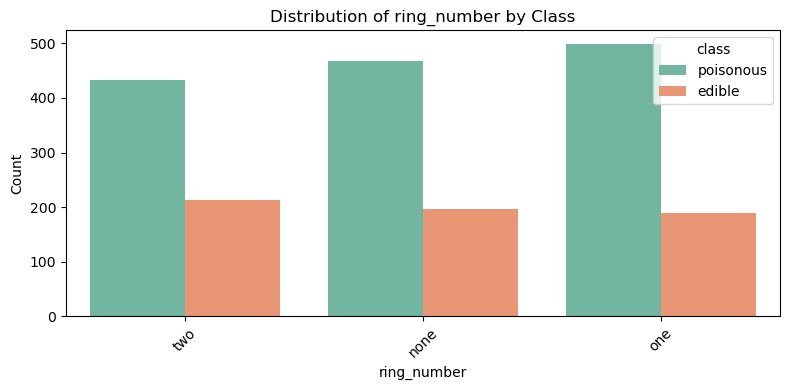

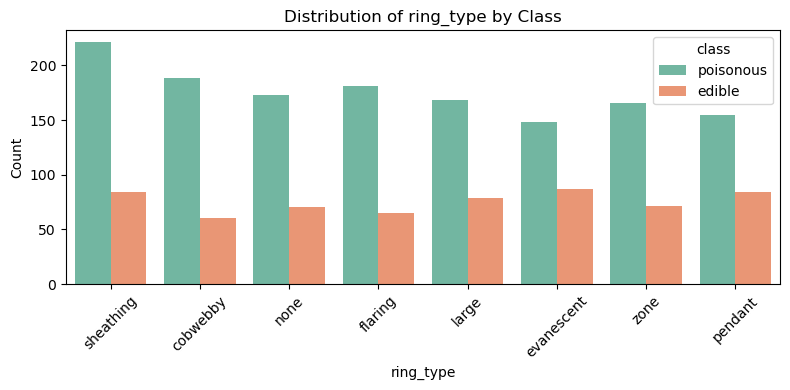

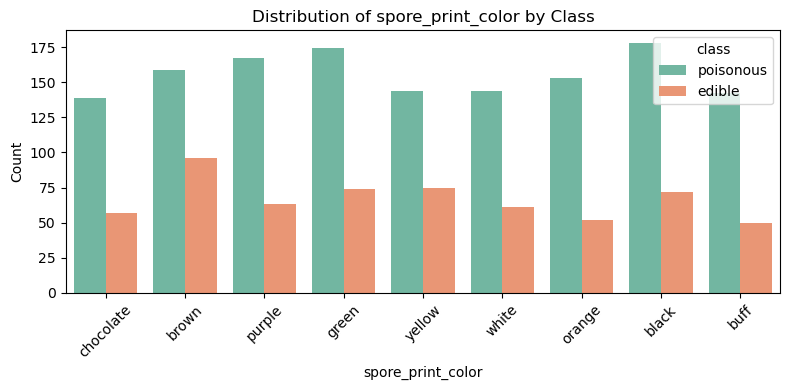

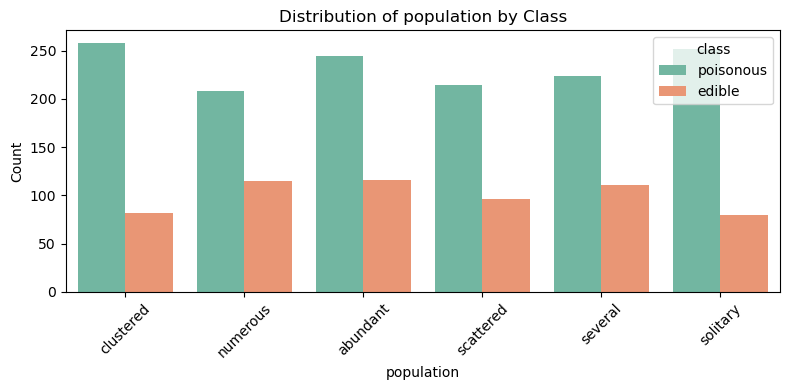

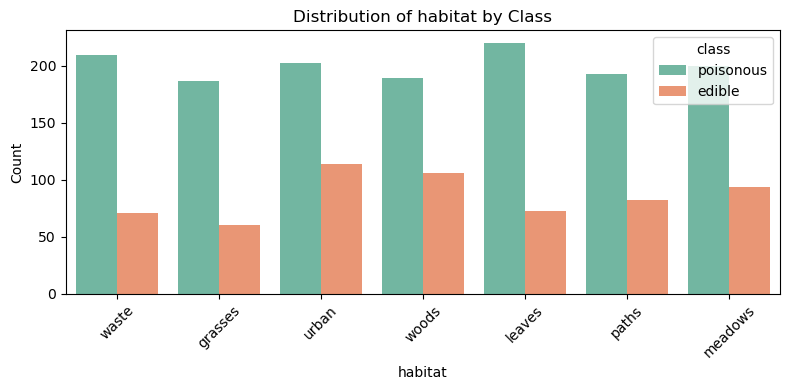

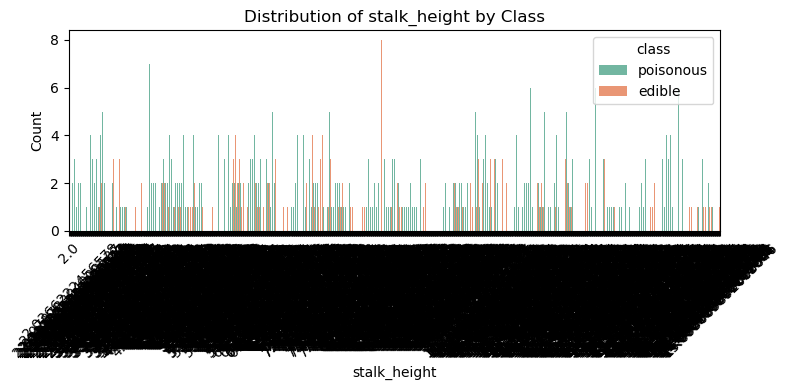

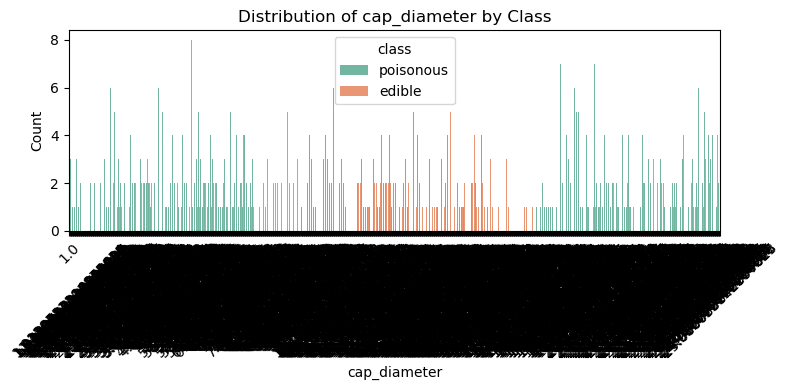

In [40]:
#distribution of class vs other features
for col in df.columns:
    if col != 'class':  # Skip the target column
        plt.figure(figsize=(8, 4))
        
        # Plot the countplot for the feature against the class
        sns.countplot(data=df, x=col, hue='class', palette='Set2')
        
        plt.title(f'Distribution of {col} by Class')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [72]:
df3.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

# 3) Model Building

In [74]:
X = df3.drop(['class'], axis=1)
y = df3['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.1)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.svm import SVC

In [78]:
svm = SVC(random_state = 42, gamma = 'auto')
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 89.0%


In [79]:
#Classification report
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        67
           1       0.86      1.00      0.92       133

    accuracy                           0.89       200
   macro avg       0.93      0.84      0.86       200
weighted avg       0.91      0.89      0.88       200



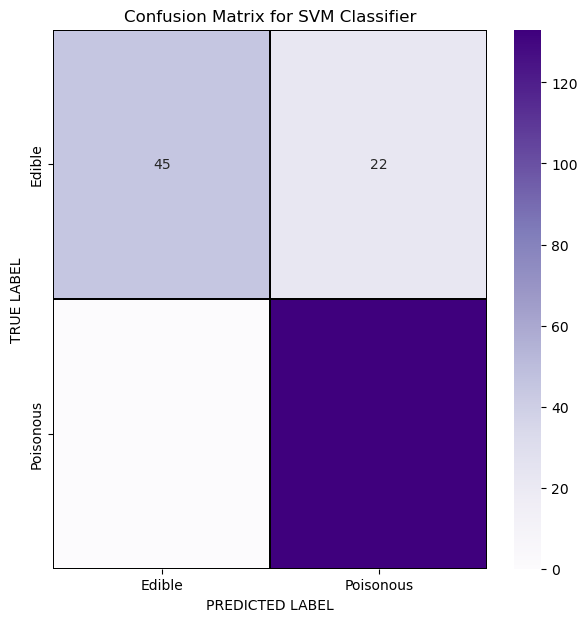

In [80]:
#Confusion Matrix for SVM Classifier

cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [ ]:
'''
PRACTICAL IMPLICATIONS OF SVM
Text Classification and Spam Detection:

SVM is widely used in email spam detection systems due to its ability to handle high-dimensional data effectively.
Helps classify documents or text into categories (e.g., sentiment analysis or topic labeling).
Image Classification:

Performs well in object detection and image classification tasks.
Applications include facial recognition, handwriting recognition, and medical imaging.
Bioinformatics:

Used for protein classification, gene expression analysis, and identifying diseases like cancer from genomic data.
Handles complex biological data with high precision.
Financial Predictions:

Helps in predicting stock market trends and credit risk assessment.
SVM's robustness to outliers makes it suitable for financial data.
'''